<a href="https://colab.research.google.com/github/derrionrobinson/Machine-Learning-Practice/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


Accuracy: 0.9825
Precision: 0.9850746268656716
Recall: 0.9850746268656716


/tmp/ipython-input-3818862595.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['ground_truth'].replace(0, 'Benign', inplace=True)


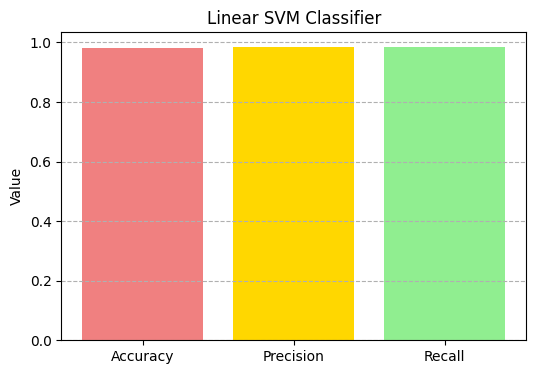

Accuracy: 0.9825
Precision: 0.9710144927536232
Recall: 1.0


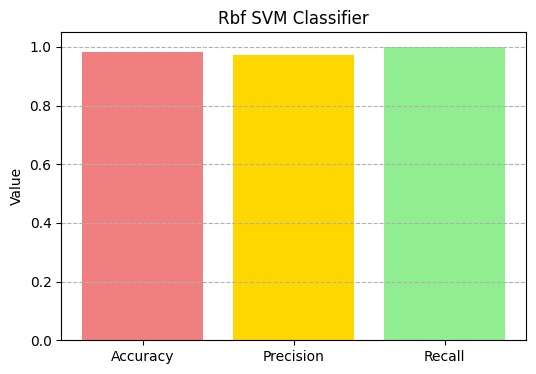

Accuracy: 0.9035
Precision: 0.8589743589743589
Recall: 1.0


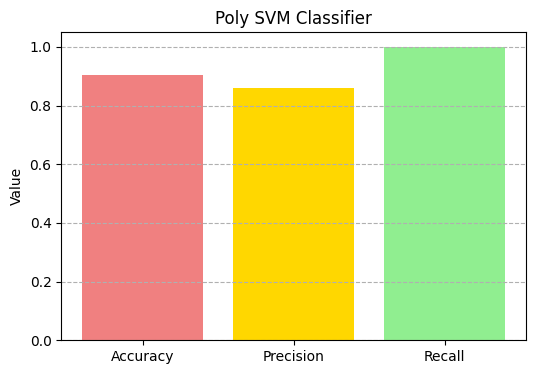

Accuracy: 0.9123
Precision: 0.9253731343283582
Recall: 0.9253731343283582


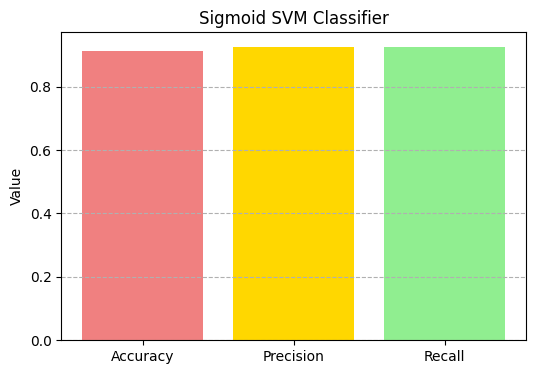

In [35]:
#Problem 1
#----------------------------------------------------#

# Load dataset
cancer_data = load_breast_cancer()
feature_values = cancer_data.data
feature_names = cancer_data.feature_names
target_values = cancer_data.target

# Create DataFrame for explanatory variables
explanatory_df = pd.DataFrame(feature_values, columns=feature_names)


# Combine features and ground truth
ground_truth = np.reshape(target_values, (569, 1))
combined_data = np.concatenate([feature_values, ground_truth], axis=1)


# Build complete DataFrame
columns_with_label = np.append(feature_names, 'ground_truth')
dataset_df = pd.DataFrame(combined_data, columns=columns_with_label)


# Replace numeric labels with class names
dataset_df['ground_truth'].replace(0, 'Benign', inplace=True)
dataset_df['ground_truth'].replace(1, 'Malignant', inplace=True)


# Define explanatory variables (X) and ground truth (y)
explanatory_variables = explanatory_df.iloc[:, 0:31].values
ground_truth = target_values


# Split into training and testing sets
explanatory_train, explanatory_test, ground_truth_train, ground_truth_test = train_test_split(
    explanatory_variables, ground_truth, test_size=0.20, random_state=0
)

# Standardize explanatory variables
scaler = StandardScaler()
explanatory_train = scaler.fit_transform(explanatory_train)
explanatory_test = scaler.transform(explanatory_test)



#Linear SVM classifier
from sklearn import svm
linear_classifier = svm.SVC(kernel="linear")

#Classification Training
linear_classifier.fit(explanatory_train, ground_truth_train)
ground_truth_pred = linear_classifier.predict(explanatory_test)

print("Accuracy: %0.4f" % metrics.accuracy_score(ground_truth_test, ground_truth_pred))
print("Precision:", metrics.precision_score(ground_truth_test, ground_truth_pred))
print("Recall:", metrics.recall_score(ground_truth_test, ground_truth_pred))

#plot
variables = ['Accuracy', 'Precision', 'Recall']
values = [metrics.accuracy_score(ground_truth_test, ground_truth_pred), metrics.precision_score(ground_truth_test, ground_truth_pred), metrics.recall_score(ground_truth_test, ground_truth_pred)]  # The values for each variable

plt.figure(figsize=(6, 4))
plt.bar(variables, values, color=['lightcoral', 'gold', 'lightgreen'])

plt.title('Linear SVM Classifier')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--')
plt.show()

#SVM RBF Classifier
from sklearn import svm
rbf_classifier = svm.SVC(kernel="rbf")
#Training the model using classifier
rbf_classifier.fit(explanatory_train, ground_truth_train)
ground_truth_pred = rbf_classifier.predict(explanatory_test)

print("Accuracy: %0.4f" % metrics.accuracy_score(ground_truth_test, ground_truth_pred))
print("Precision:", metrics.precision_score(ground_truth_test, ground_truth_pred))
print("Recall:", metrics.recall_score(ground_truth_test, ground_truth_pred))

#plot
variables = ['Accuracy', 'Precision', 'Recall']
values = [metrics.accuracy_score(ground_truth_test, ground_truth_pred), metrics.precision_score(ground_truth_test, ground_truth_pred), metrics.recall_score(ground_truth_test, ground_truth_pred)]  # The values for each variable

plt.figure(figsize=(6, 4))
plt.bar(variables, values, color=['lightcoral', 'gold', 'lightgreen'])

plt.title('Rbf SVM Classifier')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--')
plt.show()

#SVM Poly Classifier
from sklearn import svm
poly_classifier = svm.SVC(kernel="poly")
#Training the model using classifier
poly_classifier.fit(explanatory_train, ground_truth_train)
ground_truth_pred = poly_classifier.predict(explanatory_test)

print("Accuracy: %0.4f" % metrics.accuracy_score(ground_truth_test, ground_truth_pred))
print("Precision:", metrics.precision_score(ground_truth_test, ground_truth_pred))
print("Recall:", metrics.recall_score(ground_truth_test, ground_truth_pred))

#plot
variables = ['Accuracy', 'Precision', 'Recall']
values = [metrics.accuracy_score(ground_truth_test, ground_truth_pred), metrics.precision_score(ground_truth_test, ground_truth_pred), metrics.recall_score(ground_truth_test, ground_truth_pred)]  # The values for each variable

plt.figure(figsize=(6, 4))
plt.bar(variables, values, color=['lightcoral', 'gold', 'lightgreen'])

plt.title('Poly SVM Classifier')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--')
plt.show()

#SVM Sigmoid Classifier
from sklearn import svm
sigmoid_classifier = svm.SVC(kernel="sigmoid")
#Training the model using classifier
sigmoid_classifier.fit(explanatory_train, ground_truth_train)
ground_truth_pred = sigmoid_classifier.predict(explanatory_test)

print("Accuracy: %0.4f" % metrics.accuracy_score(ground_truth_test, ground_truth_pred))
print("Precision:", metrics.precision_score(ground_truth_test, ground_truth_pred))
print("Recall:", metrics.recall_score(ground_truth_test, ground_truth_pred))

#plot
variables = ['Accuracy', 'Precision', 'Recall']
values = [metrics.accuracy_score(ground_truth_test, ground_truth_pred), metrics.precision_score(ground_truth_test, ground_truth_pred), metrics.recall_score(ground_truth_test, ground_truth_pred)]  # The values for each variable

plt.figure(figsize=(6, 4))
plt.bar(variables, values, color=['lightcoral', 'gold', 'lightgreen'])

plt.title('Sigmoid SVM Classifier')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--')
plt.show()


Best Parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
RBF Model R-squared (R2) Score: -0.0157
RBF Model R-squared (R2) Score: 0.2763
RBF Model R-squared (R2) Score: 0.2763


ValueError: x and y must have same first dimension, but have shapes (0, 5) and (109,)

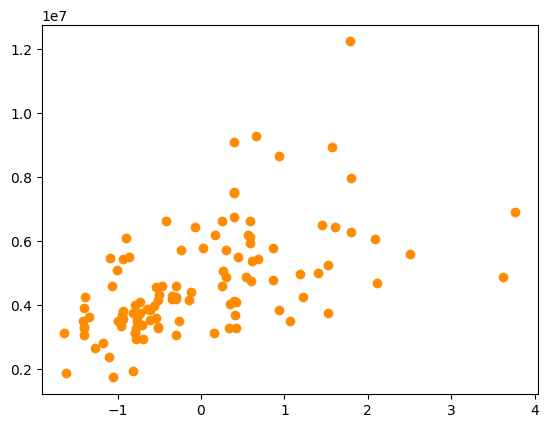

In [33]:
#Problem 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load data
# -------------------------------
url = 'https://raw.githubusercontent.com/derrionrobinson/Machine-Learning-Practice/refs/heads/main/Housing.csv'
df = pd.read_csv(url)

# Select features and target
inputs = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
output = df['price'].values.reshape(-1, 1)

# Split the housing data into training and testing sets
inputs_train, inputs_test, output_train, output_test = train_test_split(
    inputs, output, test_size=0.20, random_state=0
)

# Standardize explanatory variables (inputs)
scaler = StandardScaler()
inputs_train = scaler.fit_transform(inputs_train)
inputs_test = scaler.transform(inputs_test)

# Standardize the target variable (output)
scaler_y = StandardScaler()
output_train_scaled = scaler_y.fit_transform(output_train).ravel()
output_test_scaled = scaler_y.transform(output_test).ravel()

# Define a range of values to test
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Test a wider range for C
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'], # Test different gamma values
    'kernel': ['rbf']
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(inputs_train, output_train.ravel()) # Remember to ravel()

print("Best Parameters:", grid_search.best_params_)


#Creating RBF SVR classifier
housing_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Reshape the 2D array (N, 1) back to a 1D array (N,)
output_train_flat = output_train.ravel()

# Training the model using the classifier
housing_rbf.fit(inputs_train, output_train_flat)
rbf_output_pred = housing_rbf.predict(inputs_test)

# Calculate Regression Metric
r2 = r2_score(output_test, rbf_output_pred)

print(f"RBF Model R-squared (R2) Score: {r2:.4f}")

#Linear SVR classifier
housing_lin = SVR(kernel='linear', C=1e3)
housing_lin.fit(inputs_train, output_train_flat)
linear_output_pred = housing_lin.predict(inputs_test)

# Calculate Regression Metrics
r2 = r2_score(output_test, linear_output_pred)
print(f"RBF Model R-squared (R2) Score: {r2:.4f}")

#Poly SVR Classifier
housing_poly = SVR(kernel='poly', C=1e3, degree=2)
housing_poly.fit(inputs_train, output_train_flat)
poly_output_pred = housing_lin.predict(inputs_test)

# Calculate Regression Metrics
r2 = r2_score(output_test, linear_output_pred)
print(f"RBF Model R-squared (R2) Score: {r2:.4f}")


lw = 2
plt.scatter(inputs_test[:, 0], output_test, color='darkorange', label='data')
plt.plot(inputs_test[:0], rbf_output_pred, color='navy', lw=lw, label='RBF model')

"""
plt.plot(inputs_test, linear_output_pred, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
"""
